In [9]:
import sys, os
sys.path.append(os.path.abspath("/Users/DavidHolzwarth/Uni/EPFL/bachelors-thesis"))

import time
import matplotlib.pyplot as plt

import LE as le
import LP as lp
import iterative as iterative
import logger_creator

import graph_tools
import graph_viz as viz
import networkx as nx
import numpy as np
import pandas as pd

In [ ]:
range_x = range(0, 50001, 2500)

time_data_le = []
time_data_lp = []
time_data_iterative = []

logger, handler = logger_creator.create_logger("benchmarking")

times_le = []
times_lp = []
times_iterative = []

for num_nodes in range_x:
    print(num_nodes)

    G = nx.empty_graph(num_nodes)

    delegations = graph_tools.nx_graph_to_dict(G)

    delegation_graph = graph_tools.prepare_graph(G.nodes(), G.edges())
    delegations_orig = graph_tools.nx_graph_to_dict(delegation_graph)
    delegations = graph_tools.invert_graph(delegations_orig)
    nodes = list(delegation_graph)


    # Verify the solutions are equal
    powers_le, sinks_le = le.resolve_delegations(delegations, nodes)
    powers_lp, sinks_lp = lp.resolve_delegations(delegations, nodes)
    powers_iter = iterative.iterate_delegations(delegations, nodes)

    if powers_le.keys() != powers_lp.keys() or any(abs(powers_le[k] - powers_lp[k]) > 10**-4 for k in powers_le):
        logger.error("Powers do not match")
        logger.error(f"LE: {powers_le}")
        logger.error(f"LP: {powers_lp}")
        print("Mismatching powers in LE and LP. Check the log file for details.")
        break

    for node in sinks_le:
        if powers_lp[node] - powers_iter[node] < 0.01:
            continue
        else:
            logger.error("Powers do not match")
            logger.error(f"LP: {powers_lp}")
            logger.error(f"Iterative: {powers_iter}")
            print("Mismatching powers in LP and Iterative. Check the log file for details.")
            break

    n = 100  # You could still use your dynamic n logic if needed

    # LE
    le_model = le.set_up(delegations, nodes)
    start_time = time.time()
    for _ in range(n):
        le.solve(*le_model)
    end_time = time.time()
    times_le.append((end_time - start_time) / n)

    # LP
    lp_model = lp.set_up(delegations, nodes)
    start_time = time.time()
    for _ in range(n):
        lp.solve(*lp_model)
    end_time = time.time()
    times_lp.append((end_time - start_time) / n)

    # Iterative
    start_time = time.time()
    for _ in range(n):
        p = iterative.iterate_delegations(delegations, nodes)
    end_time = time.time()
    times_iterative.append((end_time - start_time) / n)

time_data_le.append(times_le)
time_data_lp.append(times_lp)
time_data_iterative.append(times_iterative)

logger.removeHandler(handler)
handler.close()


0
2500
5000
7500
10000
12500
15000
17500
20000
22500


KeyboardInterrupt: 

In [5]:
x = list(range_x)

print("time_data_iterative")
print(time_data_iterative)
print("time_data_le")
print(time_data_le)
print("time_data_lp")
print(time_data_lp)

time_data_iterative
[[5.785703659057617e-05, 0.00025762081146240234, 0.00038200855255126953, 0.0005873608589172364, 0.0007099199295043945, 0.0010191583633422851, 0.0011997699737548828, 0.0012704992294311523, 0.002003481388092041, 0.0020246100425720215, 0.002627890110015869]]
time_data_le
[[6.604194641113281e-07, 0.00043344974517822265, 0.0011658692359924317, 0.001678447723388672, 0.0022188735008239744, 0.0029176568984985354, 0.0036923027038574217, 0.005276079177856445, 0.005964527130126953, 0.0056805872917175294, 0.006092410087585449]]
time_data_lp
[[0.019848618507385254, 0.06613929033279418, 0.1082079792022705, 0.147320556640625, 0.19421929121017456, 0.360777850151062, 3.072527470588684, 4.56674262046814, 19.21454376935959, 0.4446247124671936, 0.5460518002510071]]


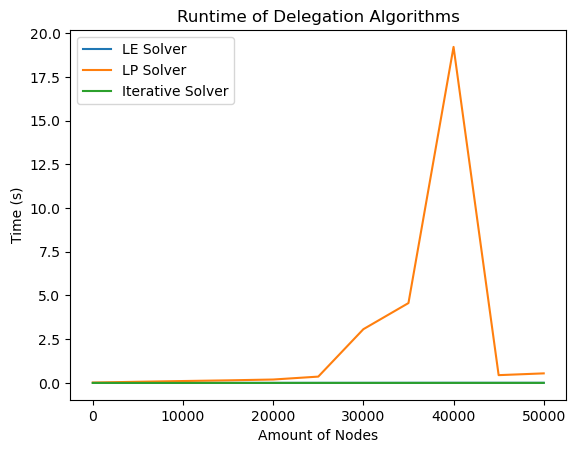

In [7]:
plt.clf()

for i in range(len(time_data_lp)):
    plt.plot(x, time_data_le[i], label=f"LE Solver")
    plt.plot(x, time_data_lp[i], label=f"LP Solver") 
    plt.plot(x, time_data_iterative[i], label=f"Iterative Solver")  

plt.legend()
plt.xlabel("Amount of Nodes")
plt.ylabel("Time (s)")
plt.title("Runtime of Delegation Algorithms")
plt.show()

In [8]:
time_data_lp

[[0.019848618507385254,
  0.06613929033279418,
  0.1082079792022705,
  0.147320556640625,
  0.19421929121017456,
  0.360777850151062,
  3.072527470588684,
  4.56674262046814,
  19.21454376935959,
  0.4446247124671936,
  0.5460518002510071]]